### Necessary Packages

In [1]:
import torch
import sys
import os
sys.path.append('..')
from src.models import Transformer
from src.utils import ImageCaptionGenerator,read_json,DatasetDescriptor,Tokenizer
from definitions import MODELS_DIR
from torchvision.transforms import Compose,Resize,ToTensor

### Global

In [2]:
WEIGHTS_PATH = os.path.join(MODELS_DIR, "transformer", "1714620426.7598236.pt")
CONFIG_PATH = os.path.join(MODELS_DIR, "transformer", "config.json")
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
IMG_SIZE = 384

### Load the model

In [4]:
descriptor : DatasetDescriptor = DatasetDescriptor.get_by_name("flickr30k")
tokenizer : Tokenizer = Tokenizer.load(descriptor.vocab_path)

In [5]:
model_config = read_json(CONFIG_PATH)

In [6]:
model = Transformer(
    **model_config,
    vocab_size=len(tokenizer.vocab),
    device=DEVICE,
    pad_idx=tokenizer.vocab.pad_idx
).to(DEVICE)

In [7]:
state_dict = torch.load(WEIGHTS_PATH)
model.load_state_dict(state_dict)

<All keys matched successfully>

### Create caption generator

In [8]:
preporcessor = Compose([
    Resize((IMG_SIZE,IMG_SIZE)),
    ToTensor()
])

In [9]:
image_caption_generator = ImageCaptionGenerator(
    model, 
    tokenizer, 
    model_config["max_len"], 
    device=DEVICE,
    preprocessor=preporcessor
)

### Testing on images from the internet

In [10]:
from PIL import Image

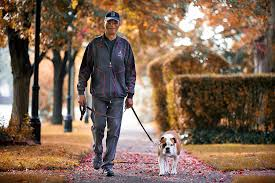

In [11]:
img = Image.open("/home/abdelnour/Documents/4eme_anne/S2/NLP/image-captioning/test_images/01.jpeg")
img

In [12]:
image_caption_generator.get_caption(img)

'A man and a dog are walking down a path'